# Week3 授業課題 信用情報を分析しよう

## 【問題1】コンペティション内容の把握
以下の観点に気をつけて、どのようなコンペティションなのかレポートしてください。

- このコンペティションでは何を予測する？目的変数は？
- 企業がこのコンペティションを開催することで得られるメリットは？
- データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？

- **このコンペティションでは何を予測する？目的変数は？**  
ローン（お金）を借りたい人の返済能力があるかを予測する。  
目的変数は"TARGET"
    - 1:返済困難なクライアント
    - 0:返済可能と考えられるクライアント


- **企業がこのコンペティションを開催することで得られるメリットは？**  
過去の信用情報が不十分なクライアントに対しても、電話会社や取引情報などの様々な情報を用いて、返済が可能かを審査する仕組みを作ることができる。

- **データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？**
    - 負債状況
    - 家族構成
    - 月々の電話代の支払い状況（支払い遅延等がないか）
    - 給料
    - 会社
    - 学歴
    - 職種
    

## 【問題2】データの概観
データの概観を把握してください。

（例）

- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスごとのデータ数をグラフに出す
- コードと表・グラフだけではなく、結果に対する説明や考察も行ってください。

### .head()、.info()、describe()などを使う


In [1]:
# モジュールをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# train.csvの読み込み
df_train = pd.read_csv("application_train.csv")
df_train[:10]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0                0   
1             ...                             0                0   
2             ...                             0                0   
3             ...                             0                0   
4             ...                             0                0   
5             ...                             0                0   
6             ...                             0                0   
7             ...                             0                0   
8             ...                             0                0   
9             ...                             0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   
5                0                0                        0.0   
6                0                0                        0.0   
7                0                0                        0.0   
8                0                0                        0.0   
9                0                0                        NaN   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   
5                       0.0                         0.0   
6                       0.0                         0.0   
7                       0.0                         0.0   
8                       0.0                         0.0   
9                       NaN                         NaN   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                     

In [2]:
#学習データの情報表示
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [3]:
#特徴量の要約統計量の表示
df_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

                  ...              FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
count             ...                 307511.000000     307511.000000   
mean              ...                      0.008130          0.000595   
std               ...                      0.089798          0.024387   
min               ...                      0.000000          0.000000   
25%               ...                      0.000000          0.000000   
50%               ...                      0.000000          0.000000   
75%               ...                      0.000000          0.000000   
max               ...                      1.000000          1.000000   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000     307511.000000               265992.000000   
mean           0.000507          0.000335                    0.006402   
std            0.022518          0.018299                    0.083849   
min            0.000000          0.000000                    0.000000   
25%            0.000000          0.000000                    0.000000   
50%            0.000000          0.000000                    0.000000   
75%            0.000000          0.000000                    0.000000   
max            1.000000          1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              265992.000000              265992.000000   
mean                    0.267395                   0.265474   
std                     0.916002                   0.794056   
min                     0.000000                   0.000000   
25%                     0.000000                   0.

### 欠損値の有無を見る


In [4]:
# 欠損値があるデータをカウント
Total = df_train.isnull().sum()
# 欠損値の割合を算出
missing_rate = Total / len(df_train)

#　テーブルにカウントした欠損値と割合を格納
missing_table = pd.DataFrame({
    'Total': Total,
    'missing_rate': missing_rate
})

#欠損値の割合が大きい順にソートする
missing_table.sort_values(by='missing_rate', ascending=False)[:30]

Total  missing_rate
COMMONAREA_MEDI           214865      0.698723
COMMONAREA_AVG            214865      0.698723
COMMONAREA_MODE           214865      0.698723
NONLIVINGAPARTMENTS_MODE  213514      0.694330
NONLIVINGAPARTMENTS_AVG   213514      0.694330
NONLIVINGAPARTMENTS_MEDI  213514      0.694330
FONDKAPREMONT_MODE        210295      0.683862
LIVINGAPARTMENTS_MODE     210199      0.683550
LIVINGAPARTMENTS_AVG      210199      0.683550
LIVINGAPARTMENTS_MEDI     210199      0.683550
FLOORSMIN_AVG             208642      0.678486
FLOORSMIN_MODE            208642      0.678486
FLOORSMIN_MEDI            208642      0.678486
YEARS_BUILD_MEDI          204488      0.664978
YEARS_BUILD_MODE          204488      0.664978
YEARS_BUILD_AVG           204488      0.664978
OWN_CAR_AGE               202929      0.659908
LANDAREA_MEDI             182590      0.593767
LANDAREA_MODE             182590      0.593767
LANDAREA_AVG              182590      0.593767
BASEMENTAREA_MEDI         179943      0.585160
BASEMENTAREA_AVG          179943      0.585160
BASEMENTAREA_MODE         179943      0.585160
EXT_SOURCE_1              173378      0.563811
NONLIVINGAREA_MODE        169682      0.551792
NONLIVINGAREA_AVG         169682      0.551792
NONLIVINGAREA_MEDI        169682      0.551792
ELEVATORS_MEDI            163891      0.532960
ELEVATORS_AVG             163891      0.532960
ELEVATORS_MODE            163891      0.532960

### クラスごとのデータ数をグラフに出す

In [5]:
# TARGETのクラスごとのサンプル数を出力
df_train["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

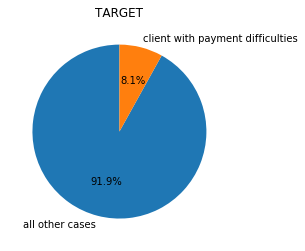

In [6]:
import matplotlib.pyplot as plt

#ラベルづけ
label = ['all other cases', 'client with payment difficulties']

# 円グラフを表示
plt.pie(
    df_train["TARGET"].value_counts(), 
    autopct="%1.1f%%", 
    labels = label, 
    startangle=90,   # グラフの開始位置を12時の位置に変更
)
plt.title("TARGET")

plt.show()

**コードと表・グラフだけではなく、結果に対する説明や考察も行ってください。**
- 欠損値が多いため、データ処理、補填が必要
- 返済可能な人の割合が大きい

## 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。


- 欠損値の扱いについて削除を行うか、補填を行うか
- データの文字列の扱いについて検討が必要（数値に置き換えるか、使用しないか、、）
- 欠損値がターゲットにどれだけ影響与えているのか？
- 返済可能か、返済不可能か判断するための重要な特徴量はどれになるのか
- テストデータから返済可能かを予測する





## 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めましょう。過程で新しい疑問点などが生まれた場合は、加えていってください。

課題合格の条件として、表やグラフを 合計15個以上 出力してください。そして、それに対してマークダウンを使い考察を加えていきましょう。

**※考察は最下部に記載**

### 欠損値に関する探索
- missingnoによる欠損値が発生している特徴量の可視化

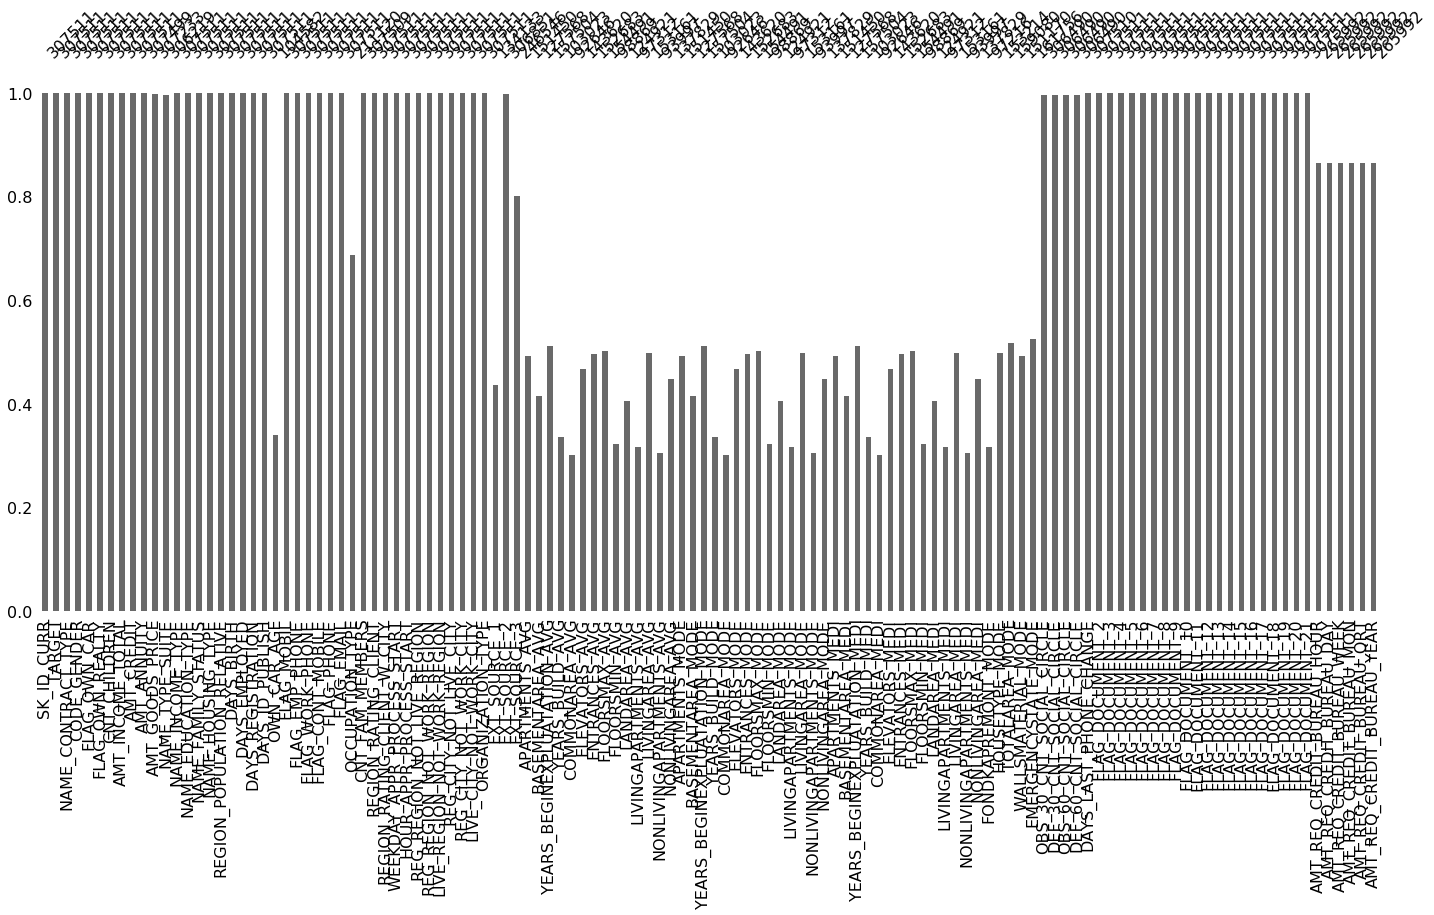

In [7]:
#missingnoモジュールのインポート
import missingno as msno

#欠損値の有無をバーとして表示
#バーが1.0に満たない特徴量に欠損値が発生していると確認できる
msno.bar(df_train)

- 欠損値が多い特徴量のリスト化

In [8]:
#欠損値の割合が大きい順にソートする
#欠損値が一つ以上発生している特徴量を抽出する
missing_table[missing_table["Total"]!=0].sort_values(by='missing_rate', ascending=False)

Total  missing_rate
COMMONAREA_MEDI               214865      0.698723
COMMONAREA_AVG                214865      0.698723
COMMONAREA_MODE               214865      0.698723
NONLIVINGAPARTMENTS_MEDI      213514      0.694330
NONLIVINGAPARTMENTS_MODE      213514      0.694330
NONLIVINGAPARTMENTS_AVG       213514      0.694330
FONDKAPREMONT_MODE            210295      0.683862
LIVINGAPARTMENTS_MODE         210199      0.683550
LIVINGAPARTMENTS_MEDI         210199      0.683550
LIVINGAPARTMENTS_AVG          210199      0.683550
FLOORSMIN_MODE                208642      0.678486
FLOORSMIN_MEDI                208642      0.678486
FLOORSMIN_AVG                 208642      0.678486
YEARS_BUILD_MODE              204488      0.664978
YEARS_BUILD_MEDI              204488      0.664978
YEARS_BUILD_AVG               204488      0.664978
OWN_CAR_AGE                   202929      0.659908
LANDAREA_AVG                  182590      0.593767
LANDAREA_MEDI                 182590      0.593767
LANDAREA_MODE                 182590      0.593767
BASEMENTAREA_MEDI             179943      0.585160
BASEMENTAREA_AVG              179943      0.585160
BASEMENTAREA_MODE             179943      0.585160
EXT_SOURCE_1                  173378      0.563811
NONLIVINGAREA_MEDI            169682      0.551792
NONLIVINGAREA_MODE            169682      0.551792
NONLIVINGAREA_AVG             169682      0.551792
ELEVATORS_MEDI                163891      0.532960
ELEVATORS_MODE                163891      0.532960
ELEVATORS_AVG                 163891      0.532960
...                              ...           ...
LIVINGAREA_MEDI               154350      0.501933
LIVINGAREA_MODE               154350      0.501933
LIVINGAREA_AVG                154350      0.501933
HOUSETYPE_MODE                154297      0.501761
FLOORSMAX_MEDI                153020      0.497608
FLOORSMAX_AVG                 153020      0.497608
FLOORSMAX_MODE                153020      0.497608
YEARS_BEGINEXPLUATATION_AVG   150007      0.487810
YEARS_BEGINEXPLUATATION_MEDI  150007      0.487810
YEARS_BEGINEXPLUATATION_MODE  150007      0.487810
TOTALAREA_MODE                148431      0.482685
EMERGENCYSTATE_MODE           145755      0.473983
OCCUPATION_TYPE                96391      0.313455
EXT_SOURCE_3                   60965      0.198253
AMT_REQ_CREDIT_BUREAU_WEEK     41519      0.135016
AMT_REQ_CREDIT_BUREAU_DAY      41519      0.135016
AMT_REQ_CREDIT_BUREAU_MON      41519      0.135016
AMT_REQ_CREDIT_BUREAU_QRT      41519      0.135016
AMT_REQ_CREDIT_BUREAU_HOUR     41519      0.135016
AMT_REQ_CREDIT_BUREAU_YEAR     41519      0.135016
NAME_TYPE_SUITE                 1292      0.004201
DEF_30_CNT_SOCIAL_CIRCLE        1021      0.003320
OBS_60_CNT_SOCIAL_CIRCLE        1021      0.003320
DEF_60_CNT_SOCIAL_CIRCLE        1021      0.003320
OBS_30_CNT_SOCIAL_CIRCLE        1021      0.003320
EXT_SOURCE_2                     660      0.002146
AMT_GOODS_PRICE                  278      0.000904
AMT_ANNUITY                       12      0.000039
CNT_FAM_MEMBERS                    2      0.000007
DAYS_LAST_PHONE_CHANGE             1      0.000003

[67 rows x 2 columns]

- 欠損値が多い特徴量を除いたデータリストでの相関行列・ヒートマップの作成

In [9]:
# 行数307511のうち、非欠損値が307411未満（＝欠損値が100以上）の場合の列を削除する
df_train_drop = df_train.dropna(axis=1, thresh=307411)

#相関係数行列を作成
corr_df_train = df_train_drop.corr(method="pearson")

#一部表示
corr_df_train[:10]

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000 -0.002108     -0.001129   
TARGET                       -0.002108  1.000000      0.019187   
CNT_CHILDREN                 -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL             -0.001820 -0.003982      0.012882   
AMT_CREDIT                   -0.000343 -0.030369      0.002145   
AMT_ANNUITY                  -0.000433 -0.012817      0.021374   
REGION_POPULATION_RELATIVE    0.000849 -0.037227     -0.025573   
DAYS_BIRTH                   -0.001500  0.078239      0.330938   
DAYS_EMPLOYED                 0.001366 -0.044932     -0.239818   
DAYS_REGISTRATION            -0.000973  0.041975      0.183395   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                         -0.001820   -0.000343    -0.000433   
TARGET                             -0.003982   -0.030369    -0.012817   
CNT_CHILDREN                        0.012882    0.002145     0.021374   
AMT_INCOME_TOTAL                    1.000000    0.156870     0.191657   
AMT_CREDIT                          0.156870    1.000000     0.770138   
AMT_ANNUITY                         0.191657    0.770138     1.000000   
REGION_POPULATION_RELATIVE          0.074796    0.099738     0.118429   
DAYS_BIRTH                          0.027261   -0.055436     0.009445   
DAYS_EMPLOYED                      -0.064223   -0.066838    -0.104332   
DAYS_REGISTRATION                   0.027805    0.009621     0.038514   

                            REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
SK_ID_CURR                                    0.000849   -0.001500   
TARGET                                       -0.037227    0.078239   
CNT_CHILDREN                                 -0.025573    0.330938   
AMT_INCOME_TOTAL                              0.074796    0.027261   
AMT_CREDIT                                    0.099738   -0.055436   
AMT_ANNUITY                                   0.118429    0.009445   
REGION_POPULATION_RELATIVE                    1.000000   -0.029582   
DAYS_BIRTH                                   -0.029582    1.000000   
DAYS_EMPLOYED                                -0.003980   -0.615864   
DAYS_REGISTRATION                            -0.053820    0.331912   

                            DAYS_EMPLOYED  DAYS_REGISTRATION  \
SK_ID_CURR                       0.001366          -0.000973   
TARGET                          -0.044932           0.041975   
CNT_CHILDREN                    -0.239818           0.183395   
AMT_INCOME_TOTAL                -0.064223           0.027805   
AMT_CREDIT                      -0.066838           0.009621   
AMT_ANNUITY                     -0.104332           0.038514   
REGION_POPULATION_RELATIVE      -0.003980          -0.053820   
DAYS_BIRTH                      -0.615864           0.331912   
DAYS_EMPLOYED                    1.000000          -0.210242   
DAYS_REGISTRATION               -0.210242           1.000000   

                                  ...         FLAG_DOCUMENT_12  \
SK_ID_CURR                        ...                -0.001045   
TARGET                            ...                -0.000756   
CNT_CHILDREN                      ...                 0.000293   
AMT_INCOME_TOTAL                  ...                 0.002540   
AMT_CREDIT                        ...                 0.003857   
AMT_ANNUITY                       ...                 0.000847   
REGION_POPULATION_RELATIVE        ...                -0.000404   
DAYS_BIRTH                        ...                 0.000236   
DAYS_EMPLOYED                     ...                -0.001225   
DAYS_REGISTRATION                 ...                 0.001682   

                            FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
SK_ID_CURR                          0.000896         -0.001077   
TARGET                             -0.011583         -0.009464   
CNT_CHILDREN                        0.003945         -0.005459   
AMT_INCOME_TOTAL              

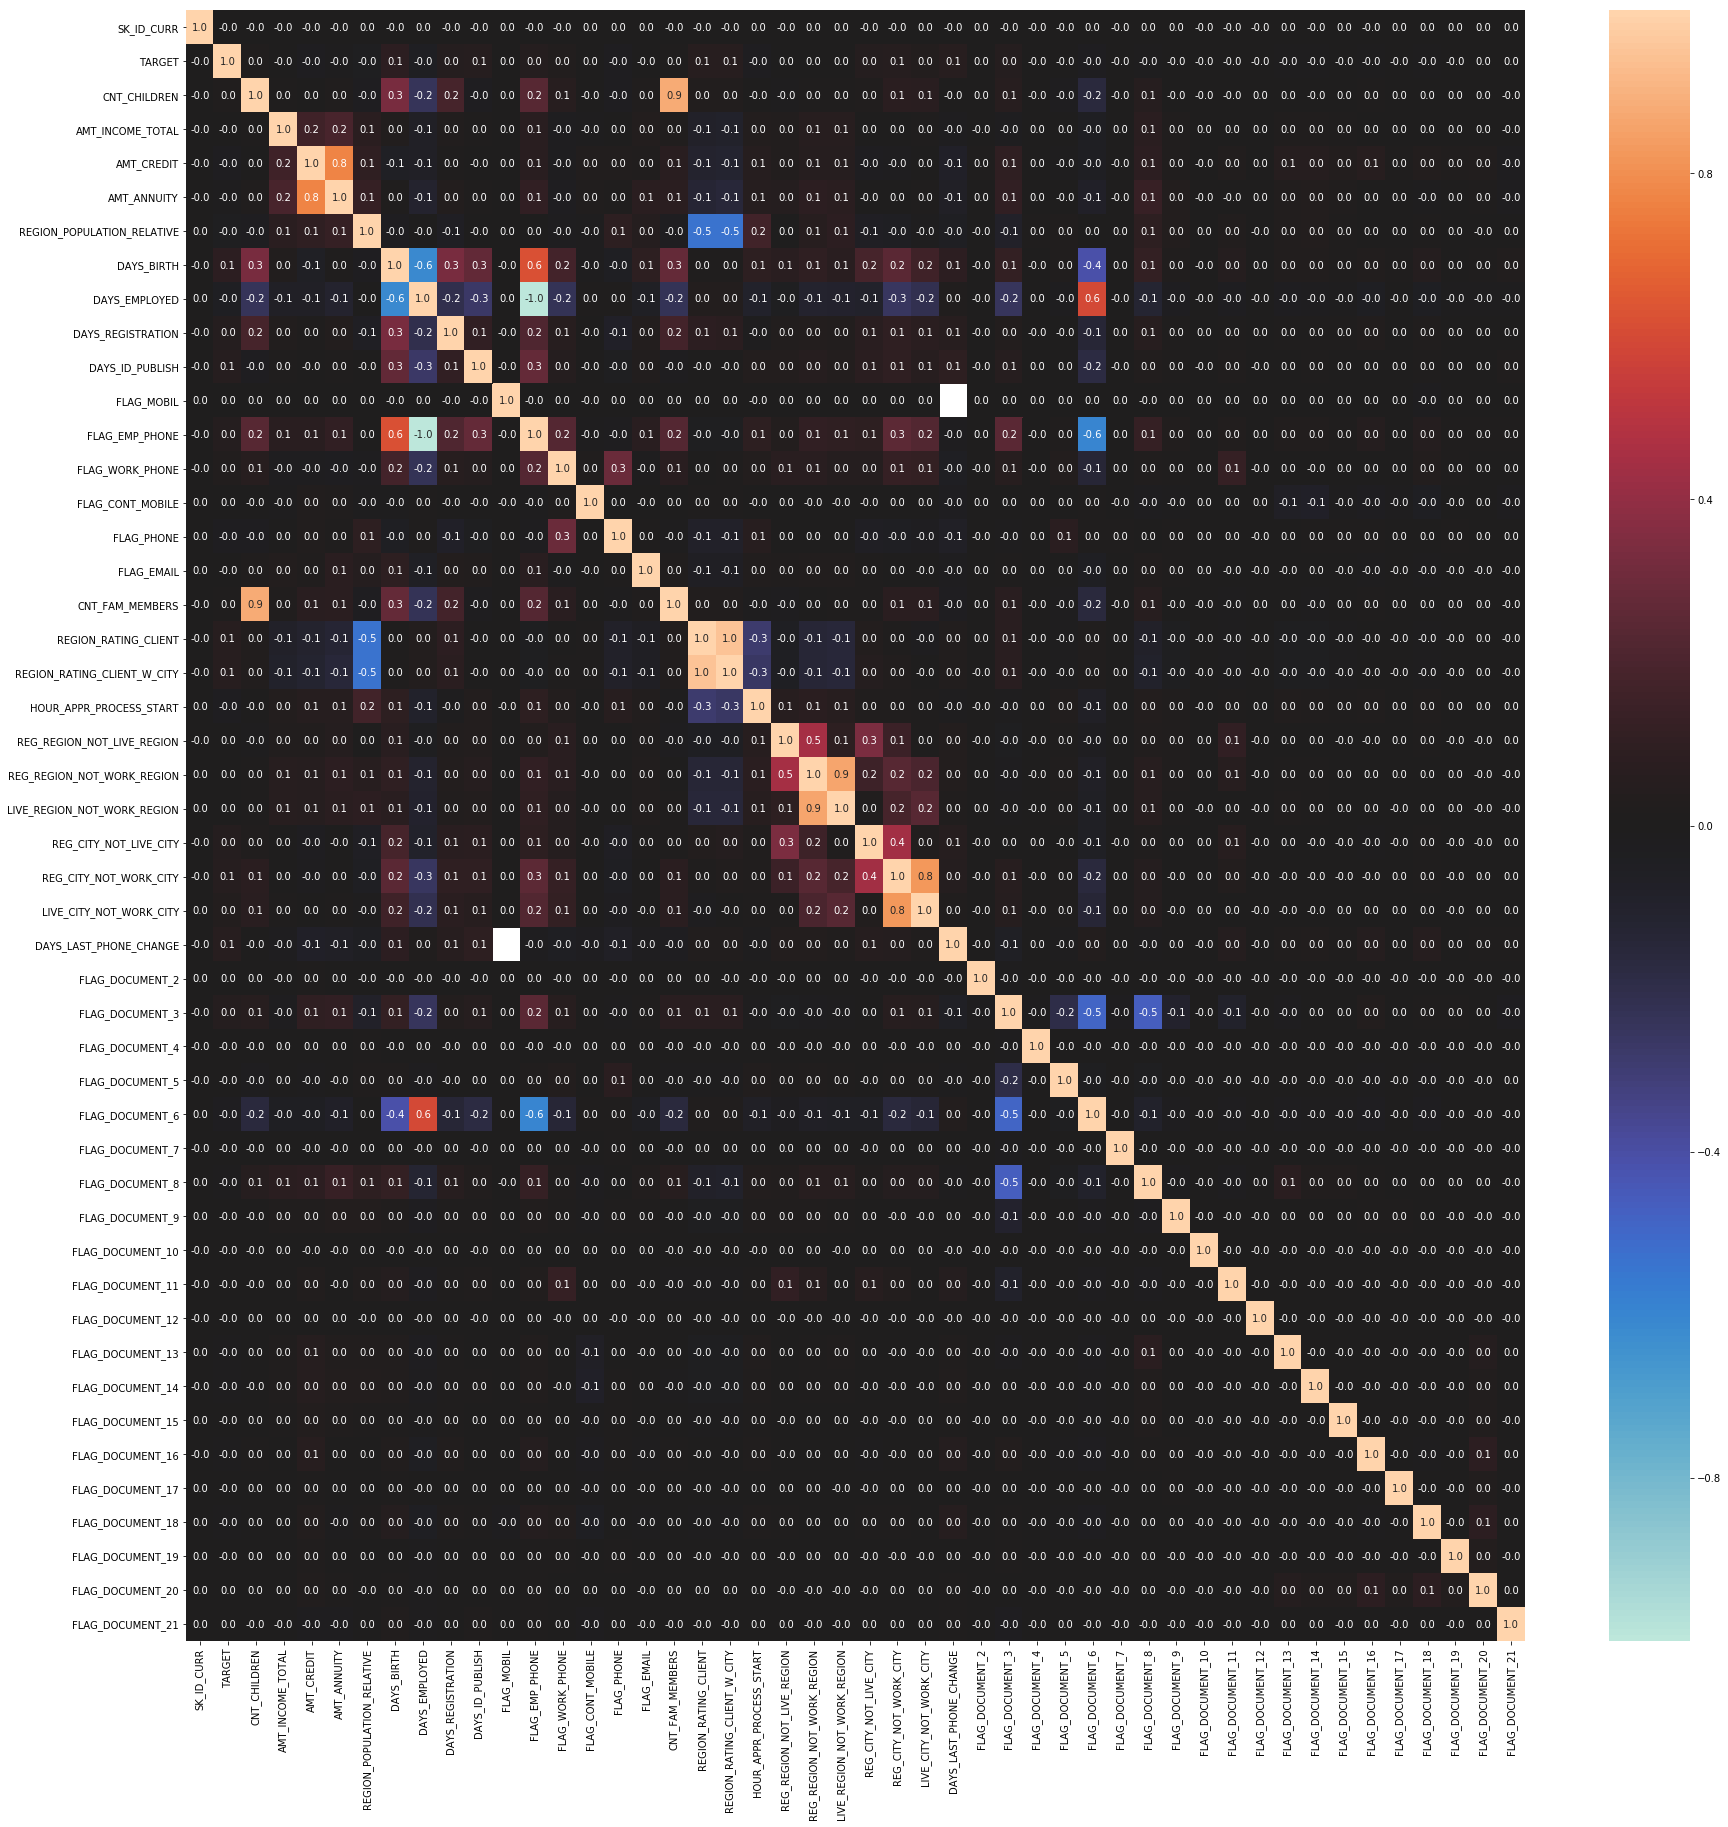

In [10]:
#図を拡大する
plt.figure(figsize=(30,30))

#ヒートマップを作成
sns.heatmap(corr_df_train,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            fmt='.1f',
            annot=True, # True:格子の中に値を表示
            xticklabels=corr_df_train.columns.values,
            yticklabels=corr_df_train.columns.values, 
           )

#出力
plt.show()

### 相関係数に関する探索

In [11]:
#目的変数との相関の高い特徴量１０個をリストに格納
highcorr_feature10 = corr_df_train.sort_values('TARGET', ascending=False)["TARGET"].index.values[0:11]

# 上記で取得した特徴量のデータセットを作成
df_train_10 = df_train_drop[highcorr_feature10]

#相関係数行列を作成
corr_df_train_10 = df_train_10.corr(method="pearson")

corr_df_train_10


TARGET  DAYS_BIRTH  \
TARGET                       1.000000    0.078239   
DAYS_BIRTH                   0.078239    1.000000   
REGION_RATING_CLIENT_W_CITY  0.060893    0.008073   
REGION_RATING_CLIENT         0.058899    0.009361   
DAYS_LAST_PHONE_CHANGE       0.055218    0.082939   
DAYS_ID_PUBLISH              0.051457    0.272691   
REG_CITY_NOT_WORK_CITY       0.050994    0.242401   
FLAG_EMP_PHONE               0.045982    0.619888   
REG_CITY_NOT_LIVE_CITY       0.044395    0.180382   
FLAG_DOCUMENT_3              0.044346    0.109666   
DAYS_REGISTRATION            0.041975    0.331912   

                             REGION_RATING_CLIENT_W_CITY  \
TARGET                                          0.060893   
DAYS_BIRTH                                      0.008073   
REGION_RATING_CLIENT_W_CITY                     1.000000   
REGION_RATING_CLIENT                            0.950842   
DAYS_LAST_PHONE_CHANGE                          0.025717   
DAYS_ID_PUBLISH                                -0.007737   
REG_CITY_NOT_WORK_CITY                          0.028081   
FLAG_EMP_PHONE                                 -0.034712   
REG_CITY_NOT_LIVE_CITY                          0.045669   
FLAG_DOCUMENT_3                                 0.067083   
DAYS_REGISTRATION                               0.074038   

                             REGION_RATING_CLIENT  DAYS_LAST_PHONE_CHANGE  \
TARGET                                   0.058899                0.055218   
DAYS_BIRTH                               0.009361                0.082939   
REGION_RATING_CLIENT_W_CITY              0.950842                0.025717   
REGION_RATING_CLIENT                     1.000000                0.026022   
DAYS_LAST_PHONE_CHANGE                   0.026022                1.000000   
DAYS_ID_PUBLISH                         -0.005103                0.088576   
REG_CITY_NOT_WORK_CITY                   0.008360                0.046788   
FLAG_EMP_PHONE                          -0.032871               -0.021103   
REG_CITY_NOT_LIVE_CITY                   0.035741                0.054183   
FLAG_DOCUMENT_3                          0.062528               -0.061760   
DAYS_REGISTRATION                        0.080210                0.056983   

                             DAYS_ID_PUBLISH  REG_CITY_NOT_WORK_CITY  \
TARGET                              0.051457                0.050994   
DAYS_BIRTH                          0.272691                0.242401   
REGION_RATING_CLIENT_W_CITY        -0.007737                0.028081   
REGION_RATING_CLIENT               -0.005103                0.008360   
DAYS_LAST_PHONE_CHANGE              0.088576                0.046788   
DAYS_ID_PUBLISH                     1.000000                0.099354   
REG_CITY_NOT_WORK_CITY              0.099354                1.000000   
FLAG_EMP_PHONE                      0.273611                0.256427   
REG_CITY_NOT_LIVE_CITY              0.076326                0.440409   
FLAG_DOCUMENT_3                     0.050309                0.056275   
DAYS_REGISTRATION                   0.101896                0.099874   

                             FLAG_EMP_PHONE  REG_CITY_NOT_LIVE_CITY  \
TARGET                             0.045982                0.044395   
DAYS_BIRTH                         0.619888                0.180382   
REGION_RATING_CLIENT_W_CITY       -0.034712                0.045669   
REGION_RATING_CLIENT              -0.032871                0.035741   
DAYS_LAST_PHONE_CHANGE            -0.021103                0.054183   
DAYS_ID_PUBLISH                    0.273611                0.076326   
REG_CITY_NOT_WORK_CITY             0.256427                0.440409   
FLAG_EMP_PHONE                     1.000000                0.092166   
REG_CITY_NOT_LIVE_CITY             0.092166                1.000000   
FLAG_DOCUMENT_3                    0.248534                0.003117   
DAYS_REGISTRATION                  0.212361                0.064334   

                             F

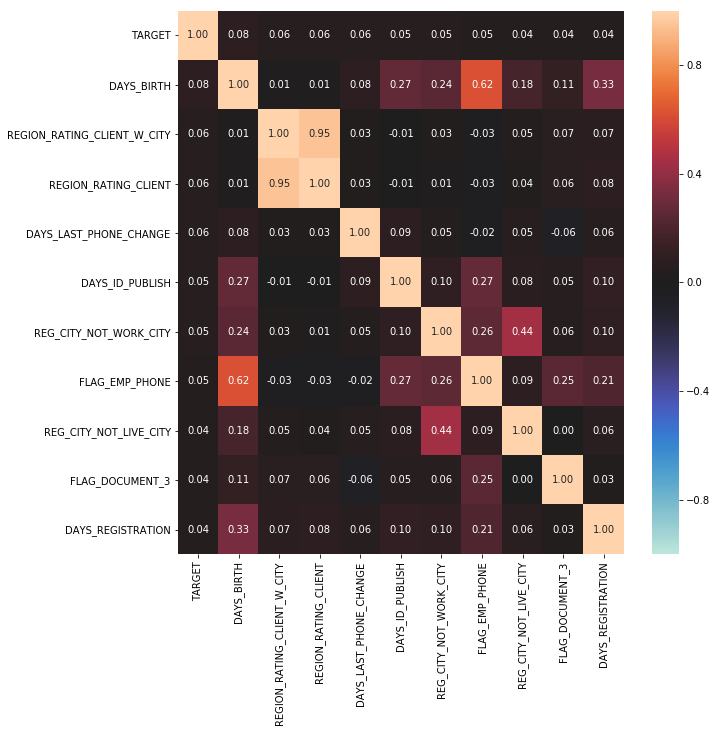

In [12]:
#図を拡大する
plt.figure(figsize=(10,10))

#相関係数が高いものを抽出したヒートマップを作成
sns.heatmap(corr_df_train_10,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            fmt='.2f',
            annot=True, # True:格子の中に値を表示
            xticklabels=corr_df_train_10.columns.values,
            yticklabels=corr_df_train_10.columns.values, 
           )

#出力
plt.show()


### 円グラフで特徴探し

In [13]:
# オブジェクト型である特徴量を円グラフのターゲットとする
object_columns = df_train.select_dtypes(include='object').columns.values
object_columns

array(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], dtype=object)

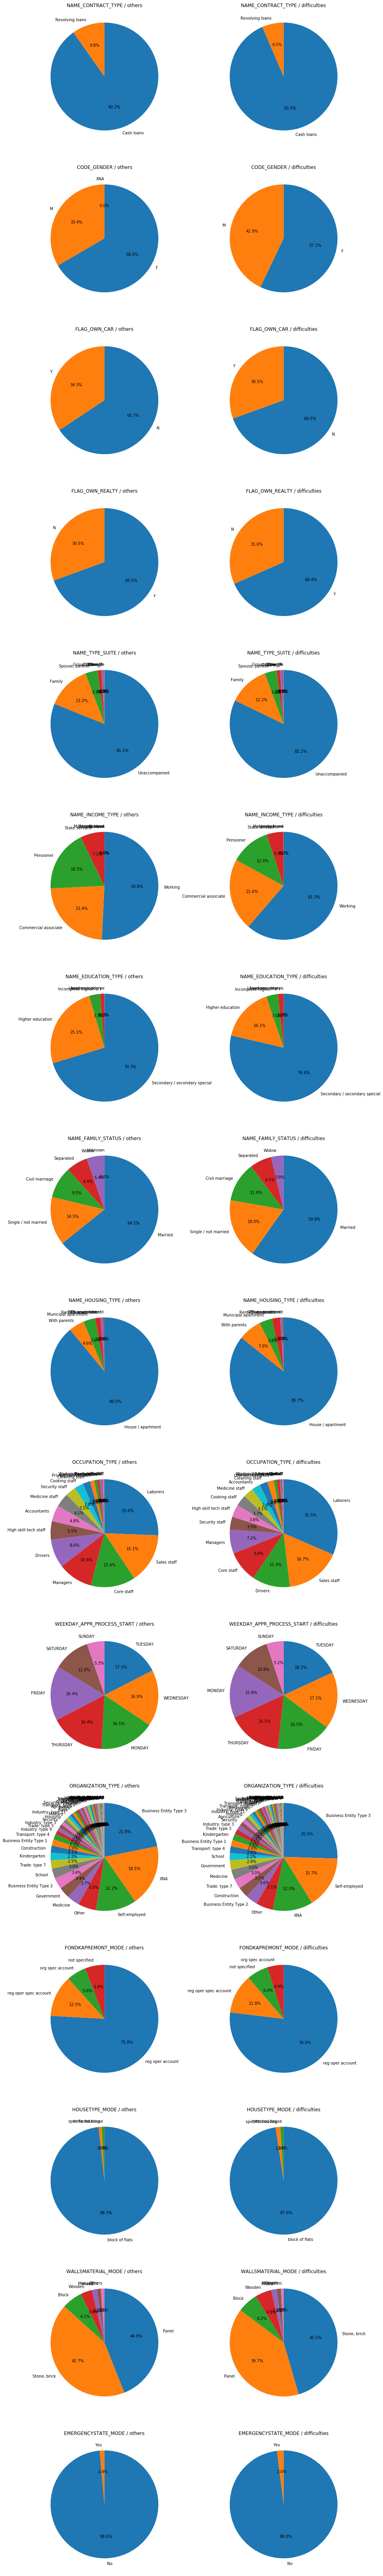

In [14]:
#　グラフを表示させる範囲を設定
fig = plt.figure(figsize=(15,120))

#オブジェクト型の特徴量をターゲットのクラスごとに１行ずつ出力する
for i in range(len(object_columns)):
    #左側に返済可能見込み者のグラフを表示する
    comparison_data0 = df_train[df_train["TARGET"]==0][object_columns[i]].value_counts()
    ax = plt.subplot2grid((16,2), (i,0))
    #円グラフ上のラベル設定
    label=comparison_data0.index
    #12時の一から時計回りに表示する
    ax.pie(comparison_data0, autopct="%1.1f%%", labels=label, startangle=90, counterclock=False)
    # タイトル設定
    plt.title(object_columns[i] + " / others")

    # 右側に返済困難者のグラフを表示する
    comparison_data1 = df_train[df_train["TARGET"]==1][object_columns[i]].value_counts()
    ax = plt.subplot2grid((16,2), (i,1))
    #円グラフ上のラベル設定
    label=comparison_data1.index
    #12時の一から時計回りに表示する
    ax.pie(comparison_data1, autopct="%1.1f%%", labels=label, startangle=90, counterclock=False)
    # タイトル設定
    plt.title(object_columns[i] + " / difficulties")


#plt.tight_layout()
    
#グラフ表示
plt.show()


### 散布図行列にて探索
- float型にて散布図行列を作成する
- int型は除いて検証
- 大まかに８つの組み合わせ同士の散布図を作成していく 
- 処理速度が遅いため、データ量を1000件に絞る

In [15]:
# float型である特徴量をセットする
number_columns = df_train.select_dtypes(include='float').columns.values

/Users/yusuke-saruya/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/yusuke-saruya/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/yusuke-saruya/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


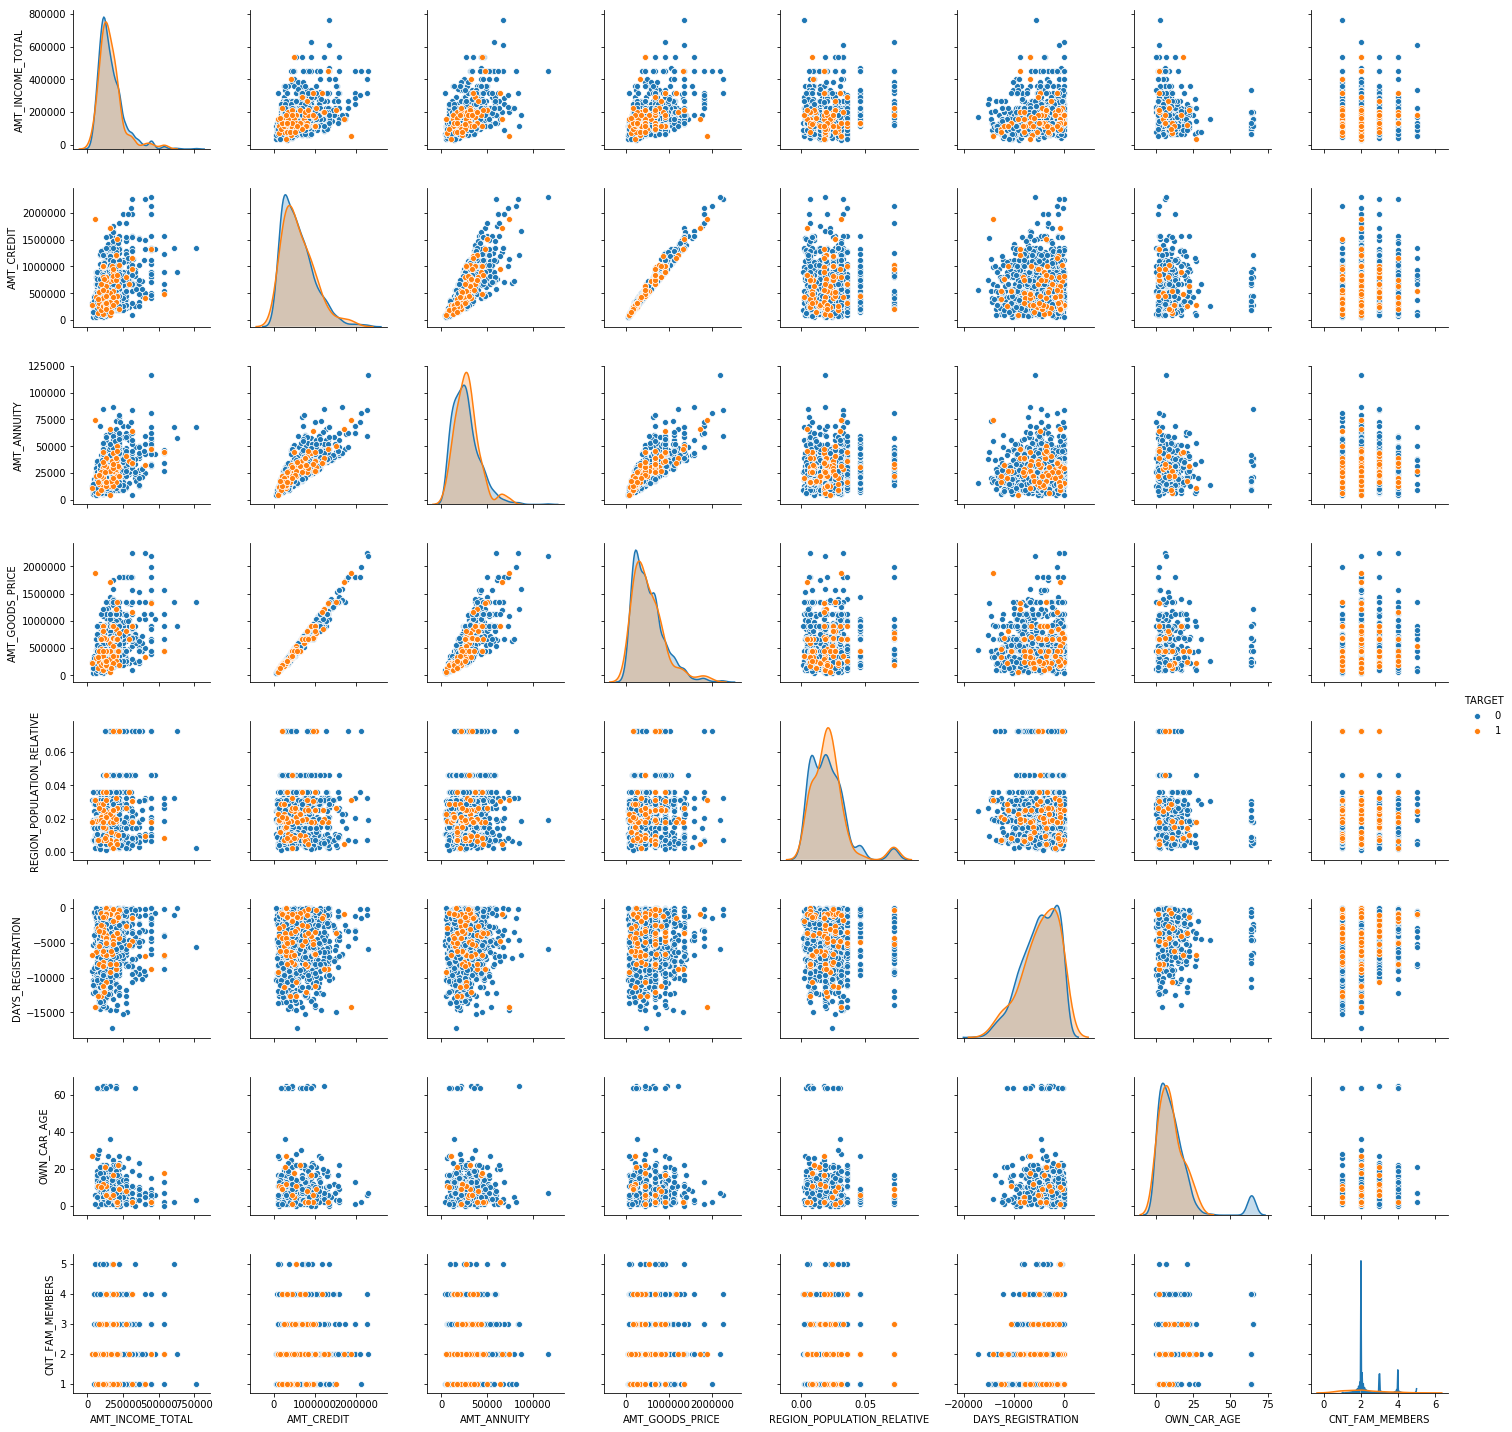

In [16]:
sns.pairplot(df_train[:1000], hue='TARGET', vars=number_columns[:8])

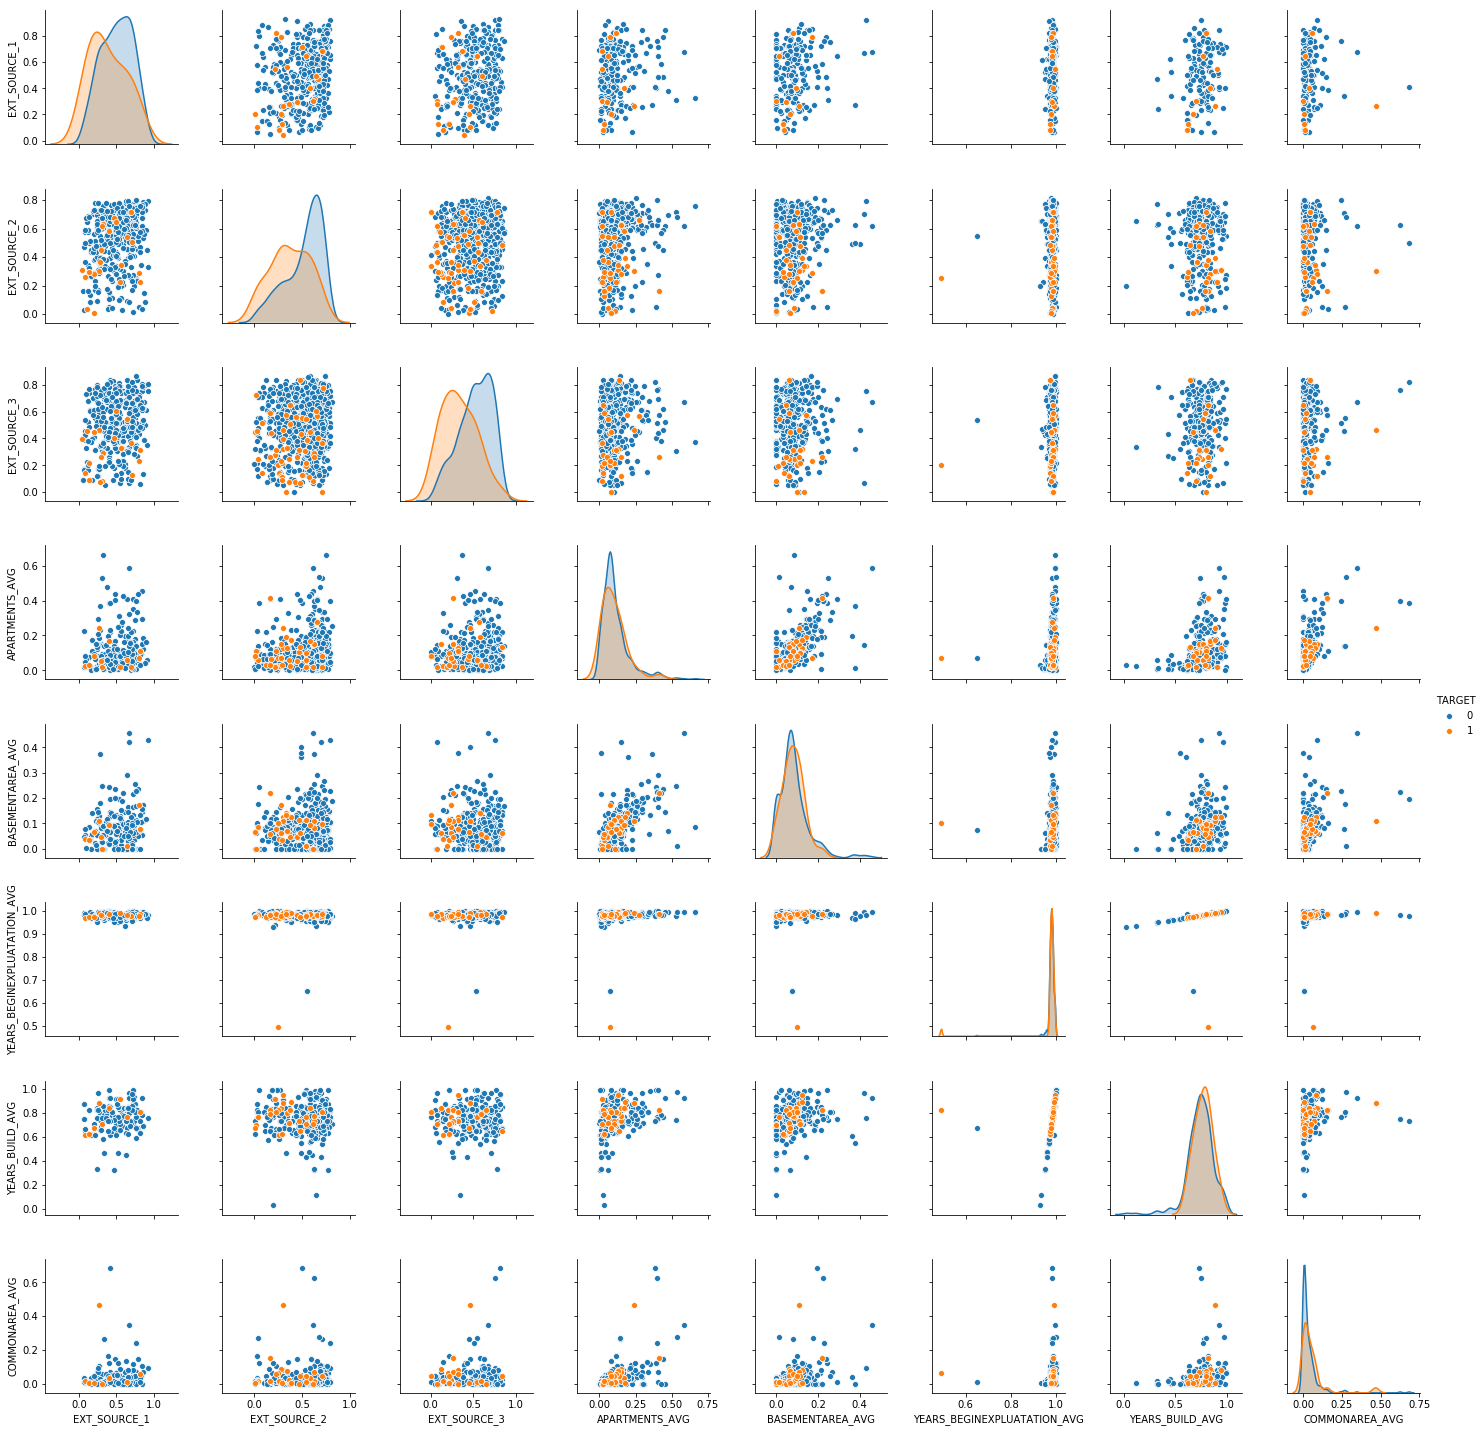

In [17]:
sns.pairplot(df_train[:1000], hue='TARGET', vars=number_columns[8:16])

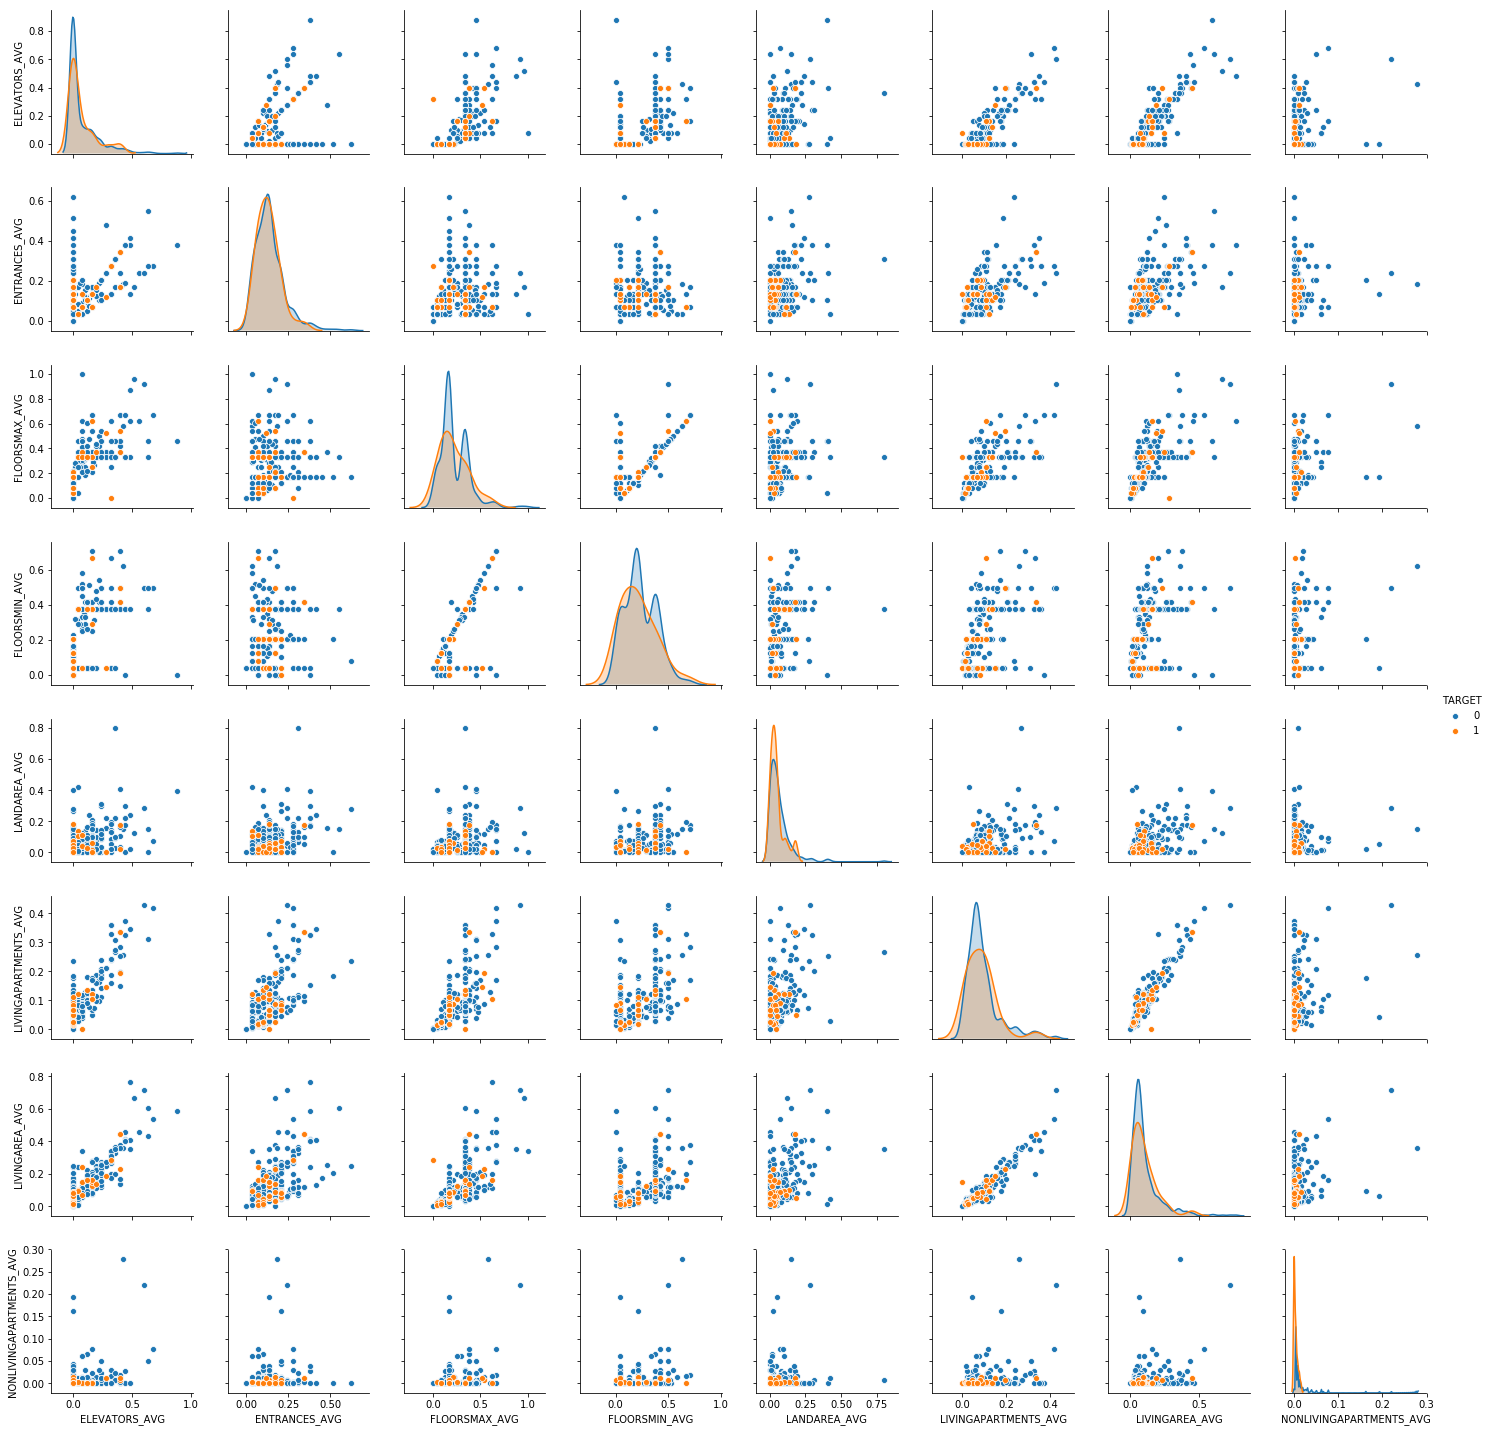

In [18]:
sns.pairplot(df_train[:1000], hue='TARGET', vars=number_columns[16:24])

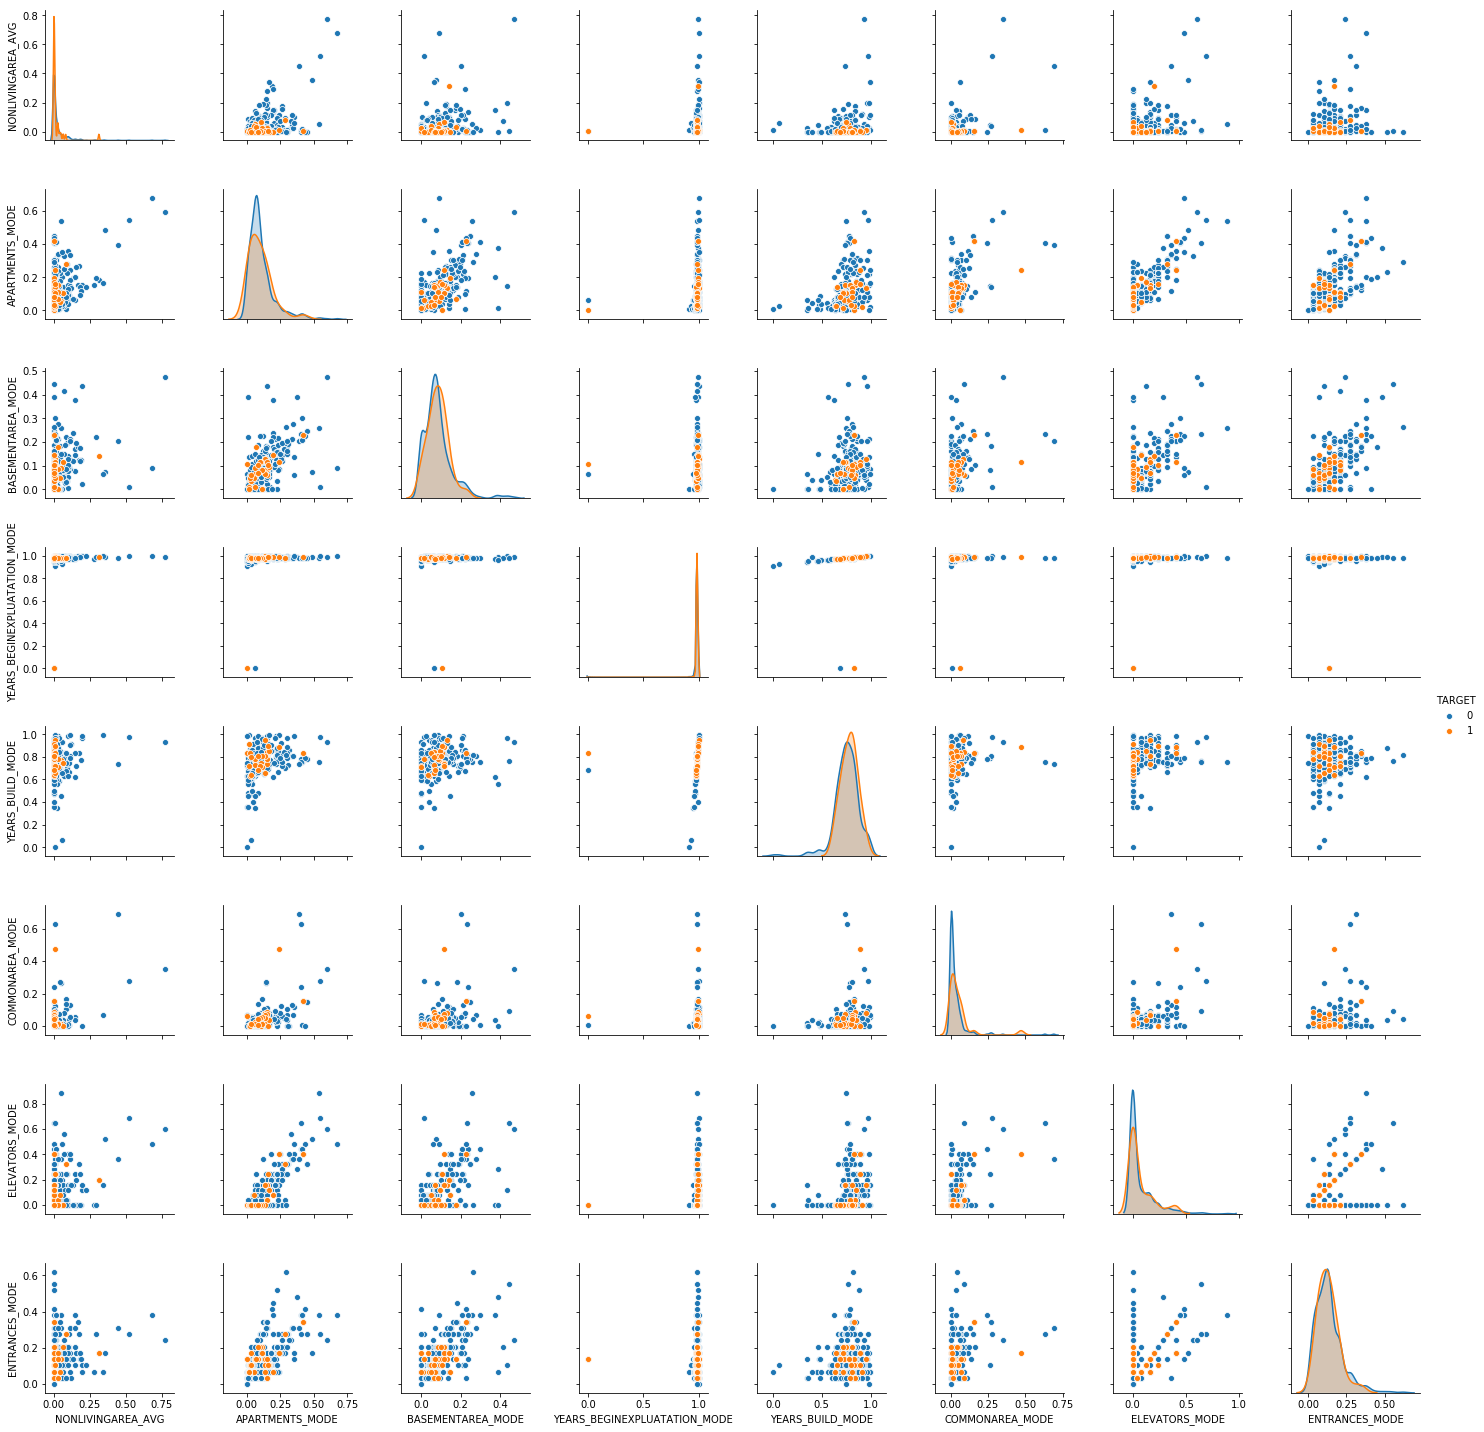

In [19]:
sns.pairplot(df_train[:1000], hue='TARGET', vars=number_columns[24:32])

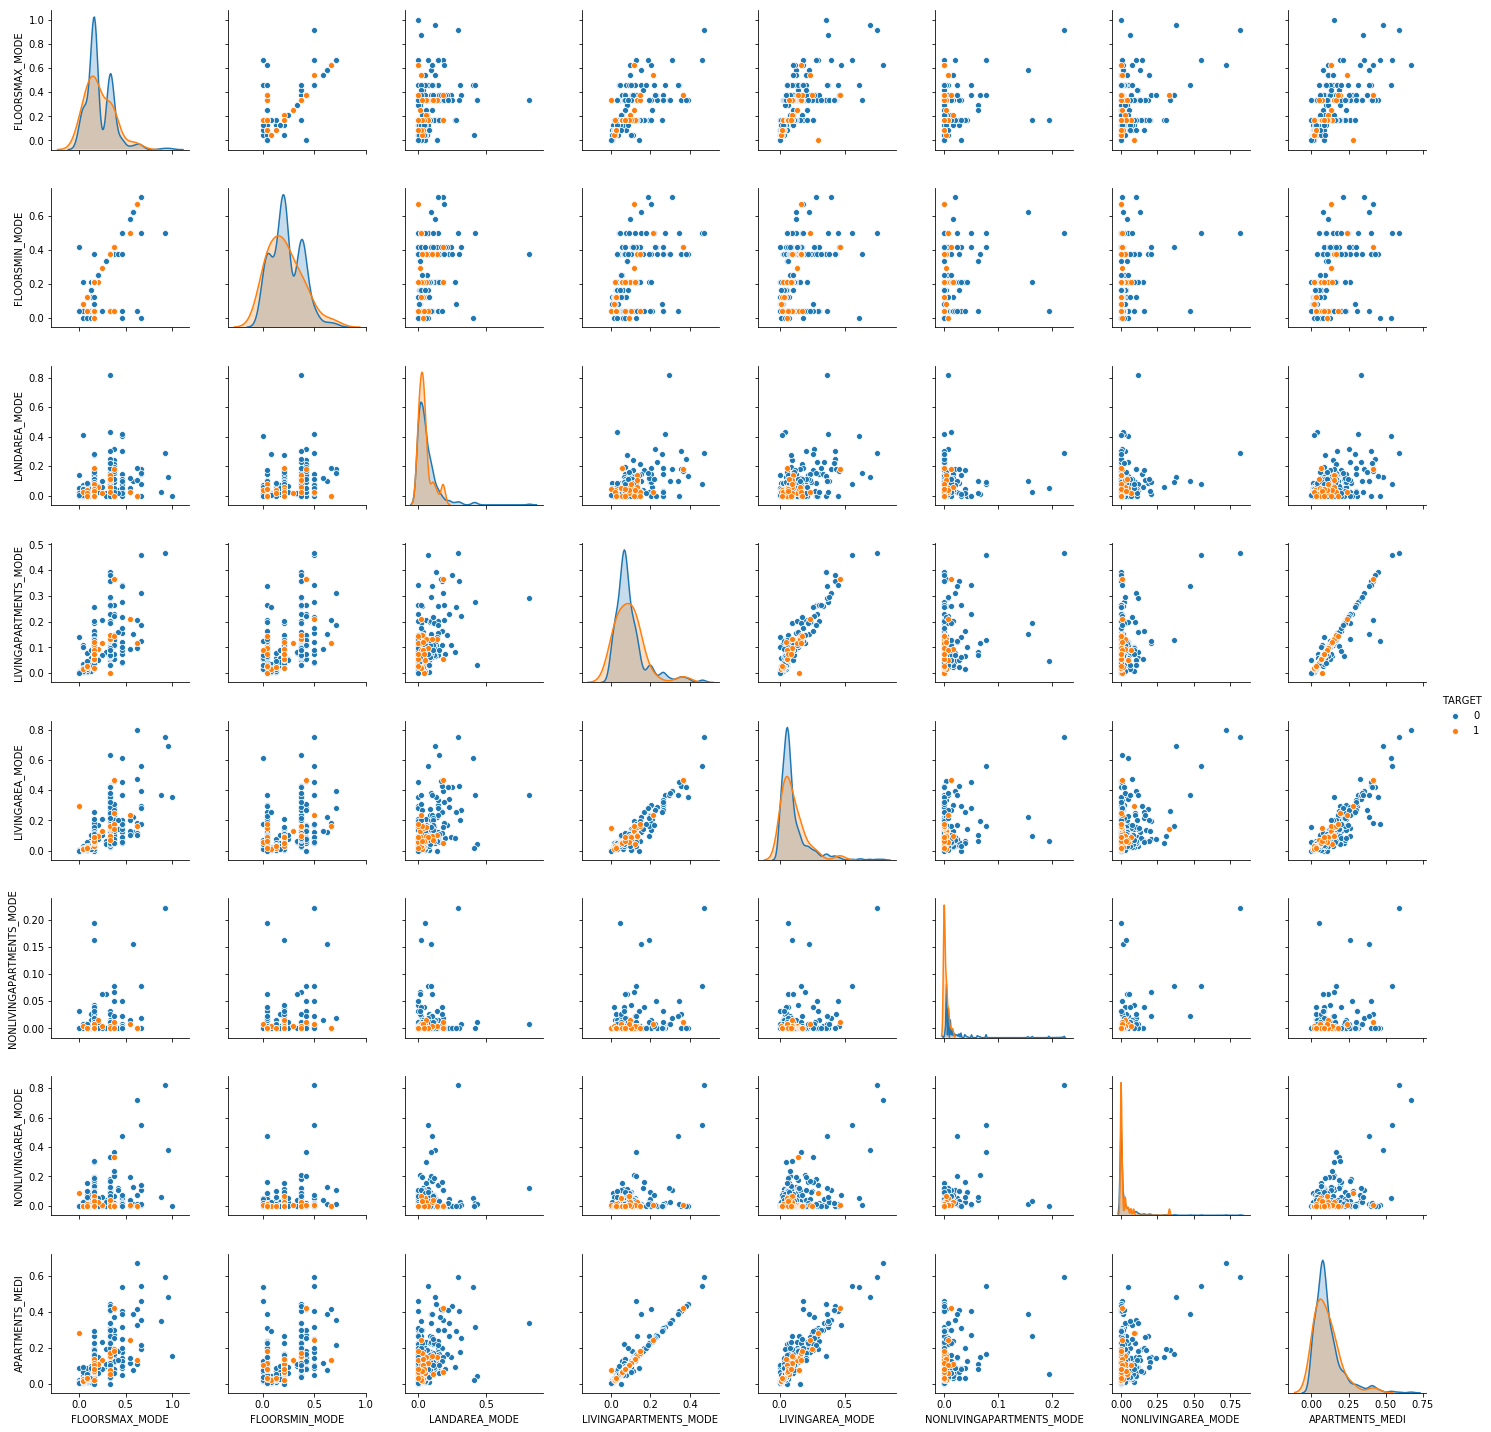

In [20]:
sns.pairplot(df_train[:1000], hue='TARGET', vars=number_columns[32:40])

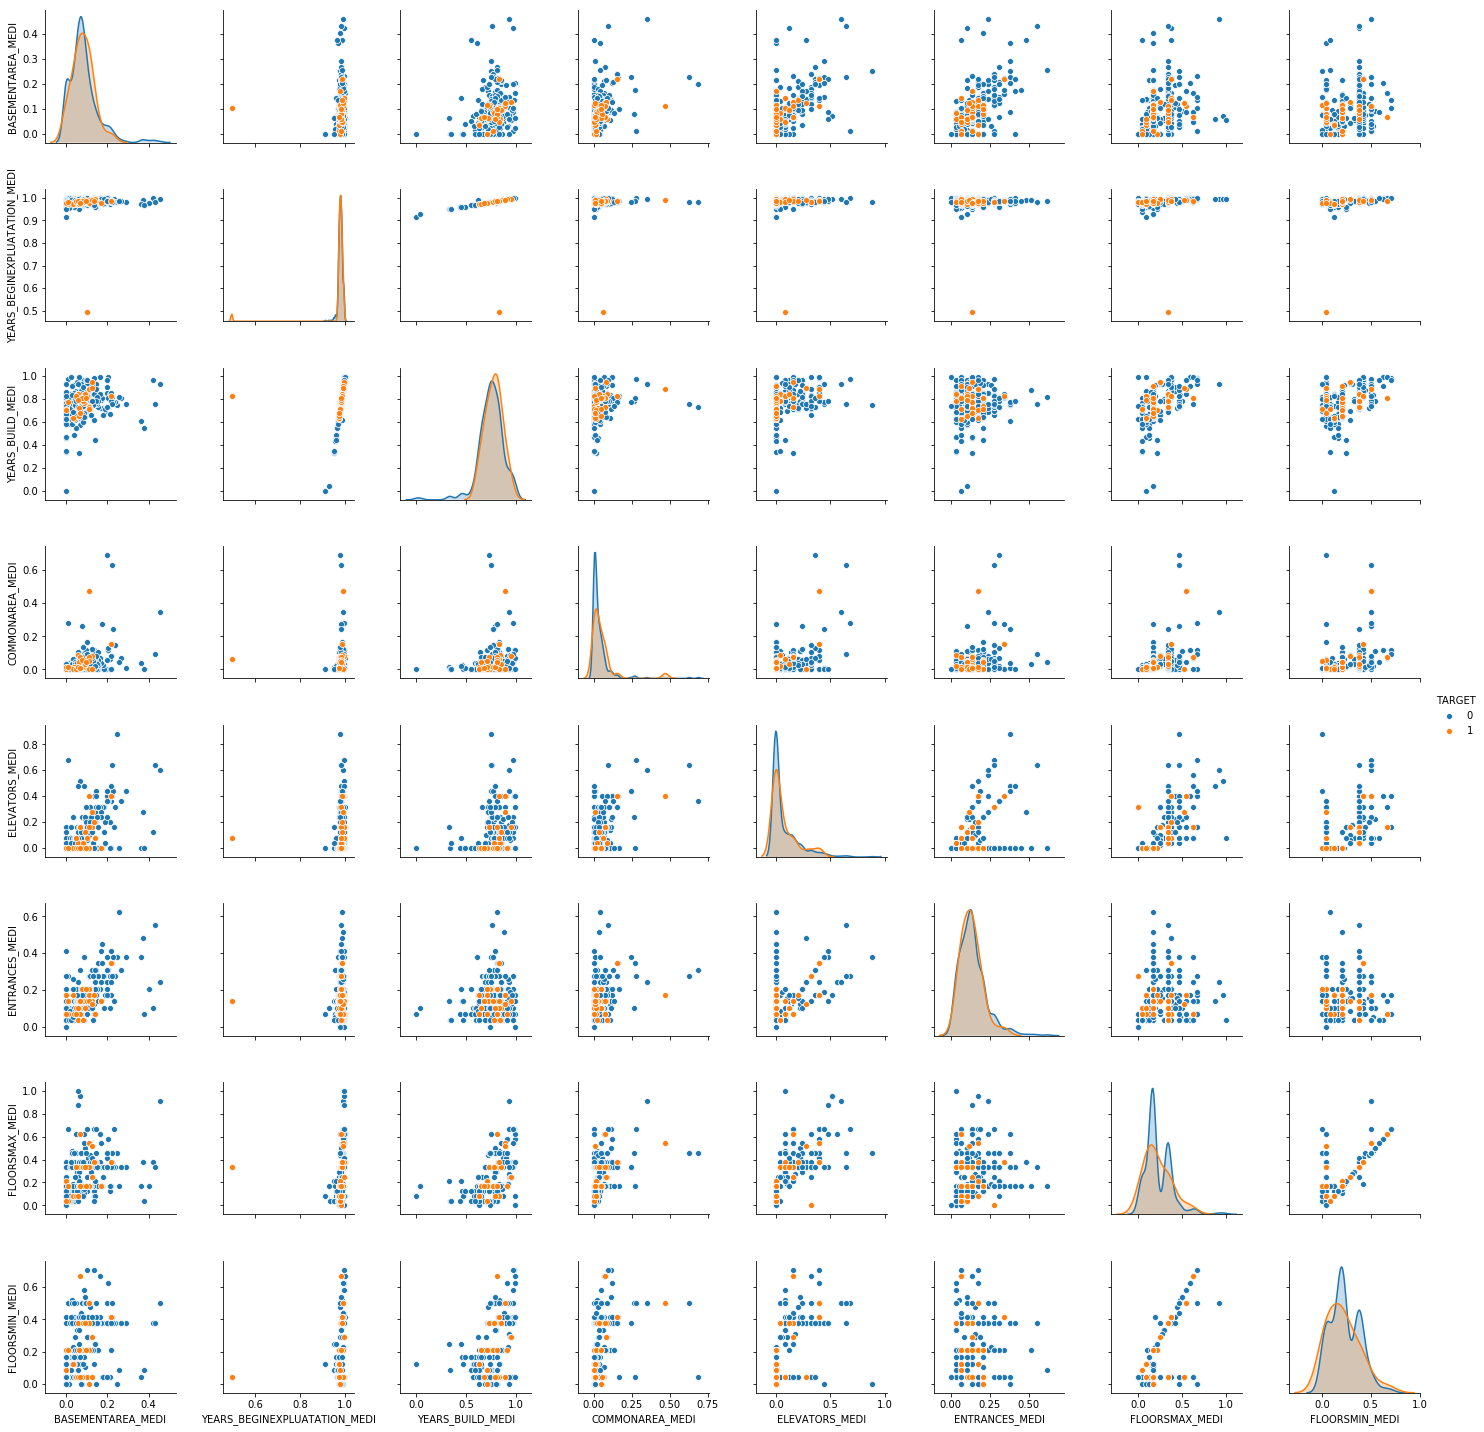

In [21]:
sns.pairplot(df_train[:1000], hue='TARGET', vars=number_columns[40:48])

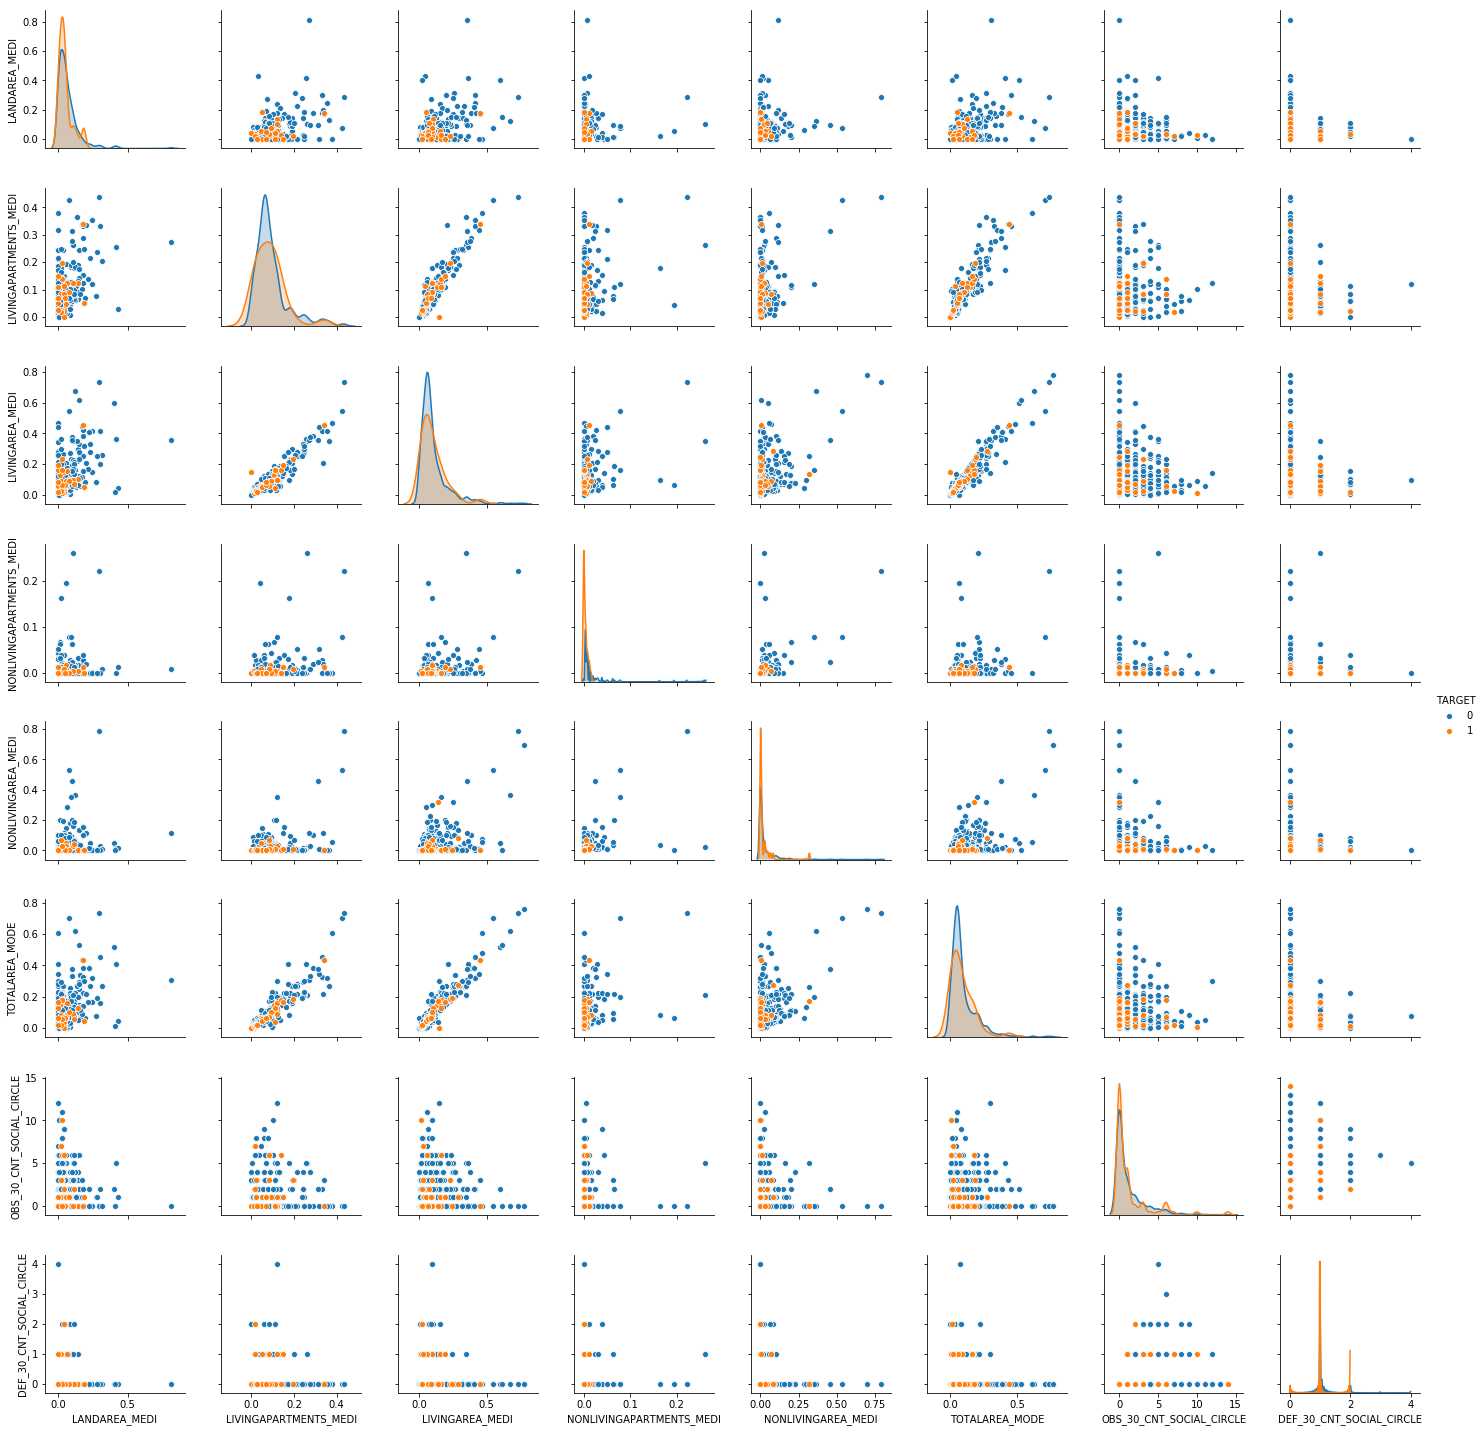

In [22]:
sns.pairplot(df_train[:1000], hue='TARGET', vars=number_columns[48:56])

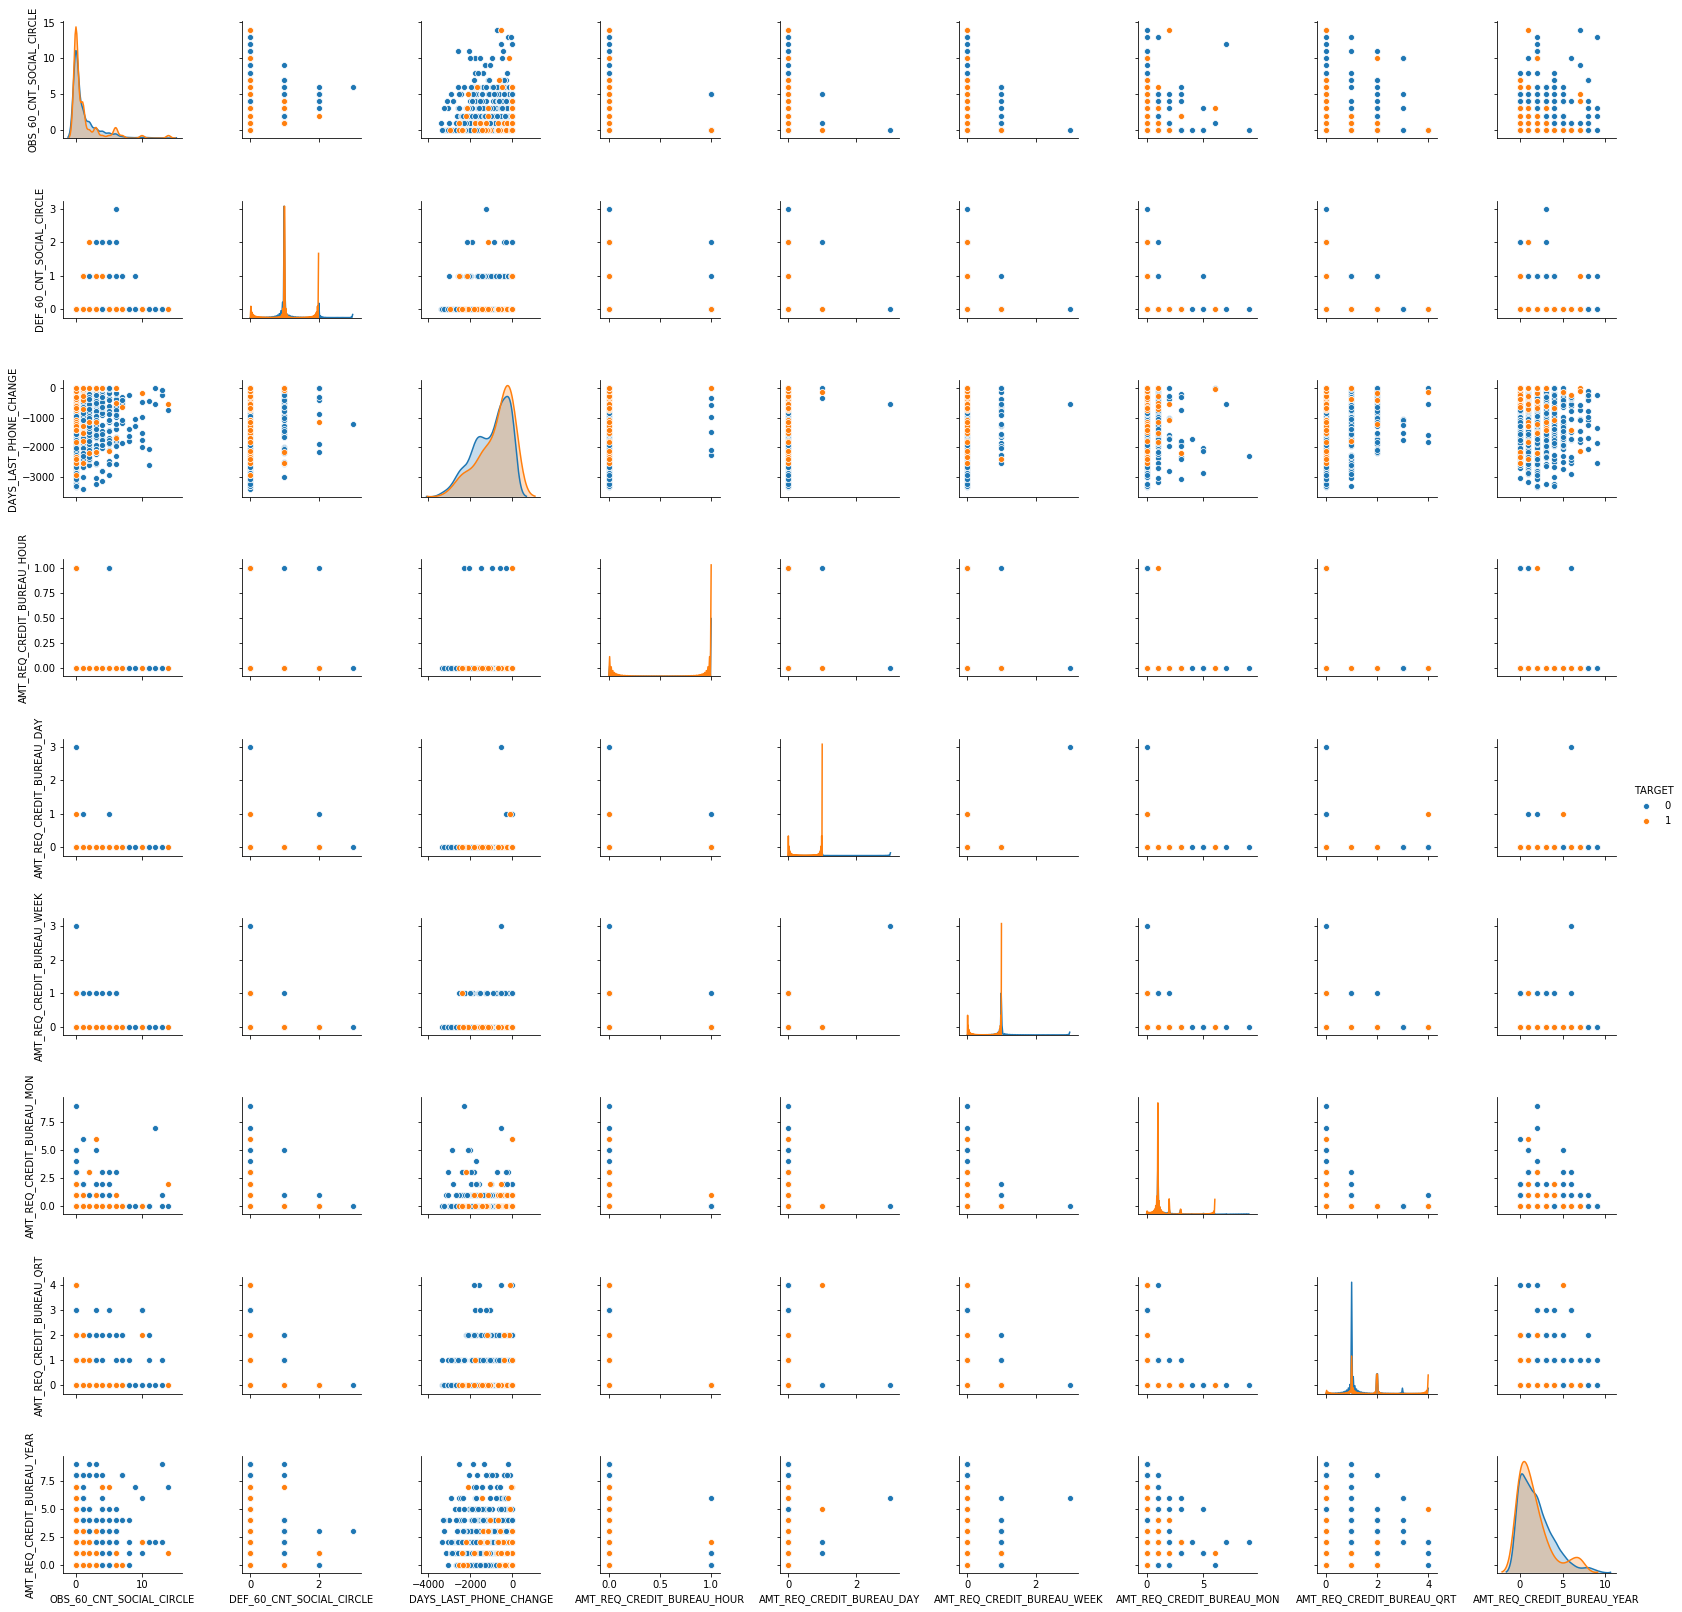

In [23]:
sns.pairplot(df_train[:1000], hue='TARGET', vars=number_columns[56:65])

### 相関係数行列に対しての探索
- 目的変数TARGETに対して、クラスごとの相関係数行列を作成する
- それぞれの相関係数行列の差分を取得し、その差が大きい組み合わせを探索していく

In [24]:
#相関係数行列を作成
corr_df_train_target1 = df_train[df_train["TARGET"]==1][number_columns].corr(method="pearson")

corr_df_train_target0 = df_train[df_train["TARGET"]==0][number_columns].corr(method="pearson")

corr_df_train_diff = (corr_df_train_target1 - corr_df_train_target0)

In [25]:
#組み合わせリスト作成用のモジュール
import itertools

#相関係数行列より、組み合わせを作る
corr_df_train_combi = list(itertools.combinations(corr_df_train_diff, 2))

#相関係数が高い組み合わせを格納する本リストの作成
high_corr_list = np.array([]).reshape([0,3])

#相関係数が高い特徴量を格納する
high_corr_feature_x = np.array([])
high_corr_feature_y = np.array([])

#組み合わせの数だけ繰り返す
for i in range(len(corr_df_train_combi)):
    #　組み合わせを定義
    combination1 = corr_df_train_combi[i][0]
    combination2 = corr_df_train_combi[i][1]
    #指定の相関係数以上であれば、
    if abs(corr_df_train_diff[combination1][combination2])  > 0.1:
            #空の仮リストに組み合わせと相関係数を仮リストに格納する
            high_corr_list_i = np.array([])
            high_corr_list_i = np.append(high_corr_list_i, combination1)
            high_corr_list_i = np.append(high_corr_list_i, combination2)
            high_corr_list_i = np.append(high_corr_list_i, corr_df_train_diff[combination1][combination2])
            
            high_corr_feature_x = np.append(high_corr_feature_x, combination1)
            high_corr_feature_y = np.append(high_corr_feature_y, combination2)
            
            #作成した仮リストを１行として本リストに追加する
            high_corr_list = np.vstack(((high_corr_list, high_corr_list_i)))
            
# 出力
print(high_corr_list)

[['AMT_INCOME_TOTAL' 'AMT_CREDIT' '-0.30466801524475146']
 ['AMT_INCOME_TOTAL' 'AMT_ANNUITY' '-0.37253182933153167']
 ['AMT_INCOME_TOTAL' 'AMT_GOODS_PRICE' '-0.31187881246968935']
 ['AMT_INCOME_TOTAL' 'REGION_POPULATION_RELATIVE' '-0.15871605001155886']
 ['AMT_INCOME_TOTAL' 'EXT_SOURCE_2' '-0.13244451911437194']
 ['AMT_INCOME_TOTAL' 'ELEVATORS_AVG' '-0.13808509644795602']
 ['AMT_INCOME_TOTAL' 'FLOORSMAX_AVG' '-0.1720895793009532']
 ['AMT_INCOME_TOTAL' 'LIVINGAREA_AVG' '-0.11707052836465666']
 ['AMT_INCOME_TOTAL' 'ELEVATORS_MODE' '-0.12590121864365814']
 ['AMT_INCOME_TOTAL' 'FLOORSMAX_MODE' '-0.16511705514969555']
 ['AMT_INCOME_TOTAL' 'LIVINGAREA_MODE' '-0.10195395137364399']
 ['AMT_INCOME_TOTAL' 'ELEVATORS_MEDI' '-0.13562489466194713']
 ['AMT_INCOME_TOTAL' 'FLOORSMAX_MEDI' '-0.17080597619263155']
 ['AMT_INCOME_TOTAL' 'LIVINGAREA_MEDI' '-0.11516036764490452']
 ['AMT_INCOME_TOTAL' 'TOTALAREA_MODE' '-0.11926345730424412']]


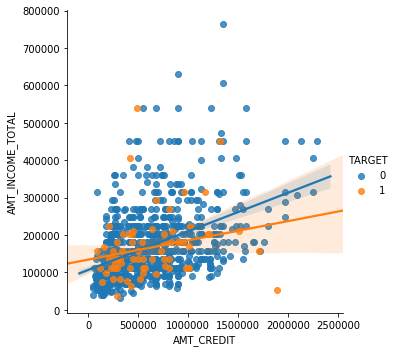

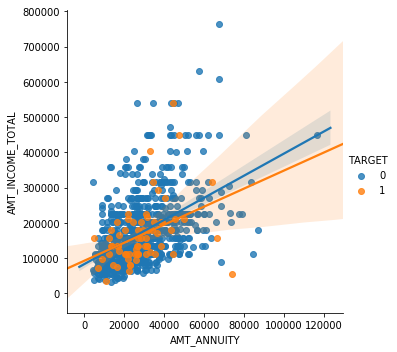

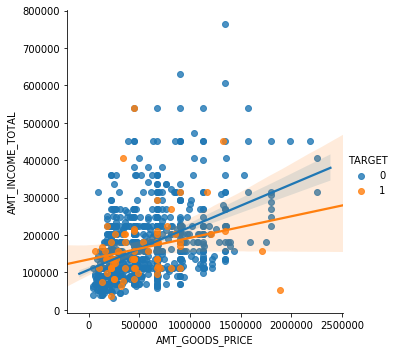

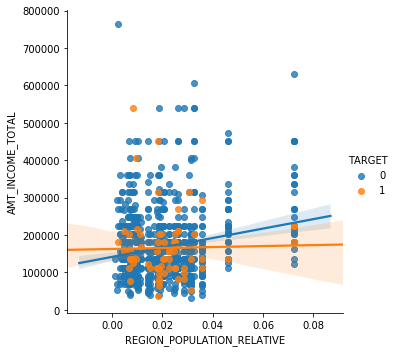

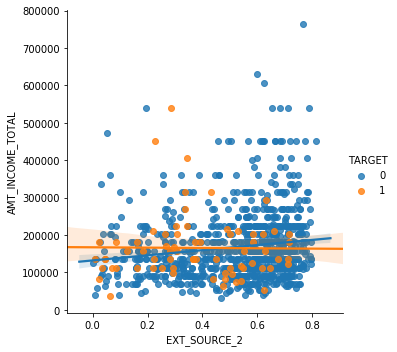

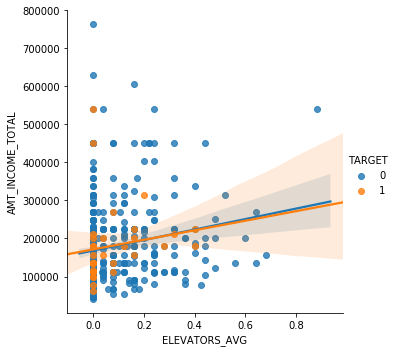

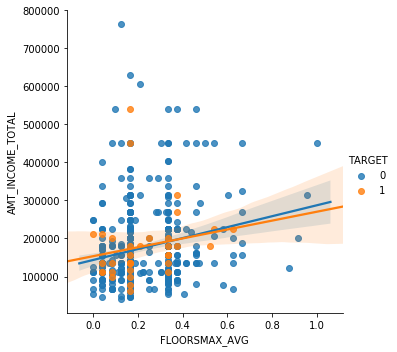

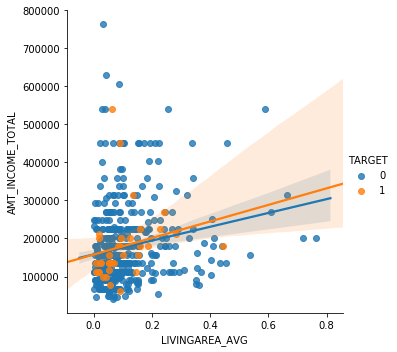

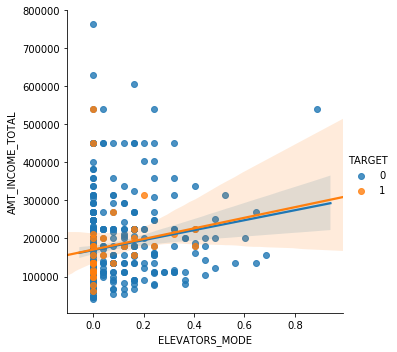

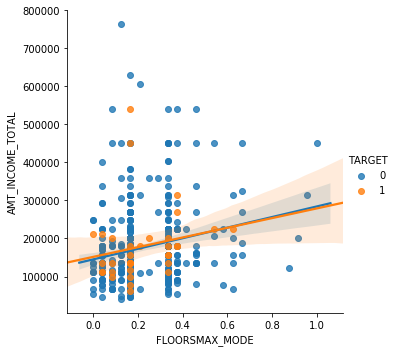

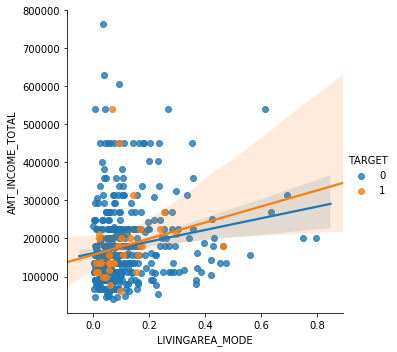

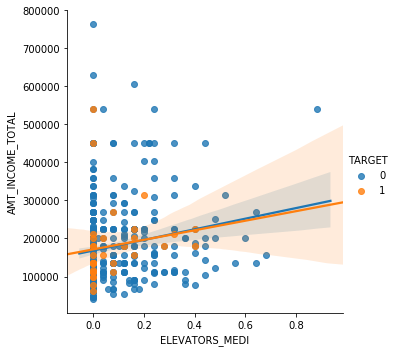

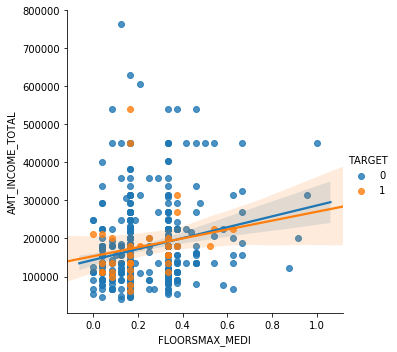

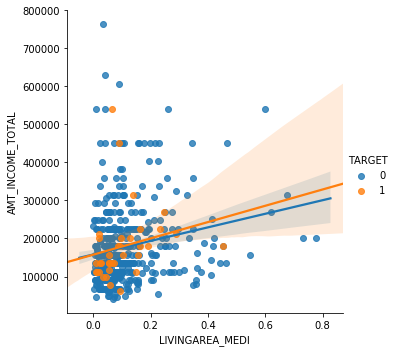

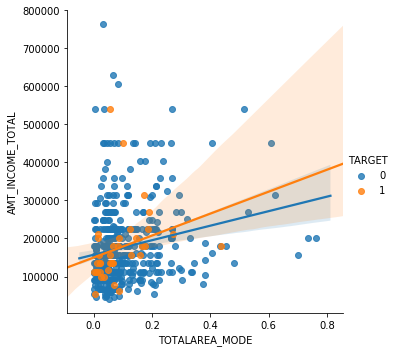

In [26]:
for i in high_corr_feature_y:
    sns.lmplot(x=i, y="AMT_INCOME_TOTAL", hue="TARGET", data=df_train[:1000])

## 考察
### 欠損値について
- 欠損値が発生している特徴量は67種類。欠損値から目的変数に対する影響度合いは確認できず。


### 目的変数との相関関係について
- 目的変数"TARGET"と相関係数が高い特徴量は確認できず。


### object型の特徴量について  
- オブジェクト型の特徴量を円グラフで目的変数のクラス別の円グラフで出力することにより、下記について確認ができた。
- 目的変数に関する分類をするにあたっては、下記特徴量を利用して分類できる可能性がある。
    - CODE_GENDER  
    債務不履行対象者の内訳比率を示したグラフでは、M(男性)の比率が約10%上昇している。

    - NAME_INCOME_TYOE  
    債務不履行対象者の内訳比率を示したグラフでは、Workingの比率が10%以上上昇している

    - NAME_EDUCATION_TYPE  
    債務不履行対象者の内訳比率を示したグラフでは、Secondaryの比率が約8%上昇し、一方でHigher educationの比率が約9%減少している


### float型特徴量の散布図行列について
- 総じて明らかに領域を決定できる線引きができる散布図は確認できなかったが、部分的に分類が可能と考える組み合わせを下記にあげる。　　
    - EXT_SOURCE_1とEXEXT_SOURCE_3  
    欠損値が発生している特徴量であるが、どちらにも欠損値が発生していない状態でEXEXT_SOURCE_3が0.6より大きい数値を取る場合、目的変数を0としてプロットしていることが確認できる。
    - OWN_CAR_AGE  
    比較する変数に関わらず、この特徴量が50以上の値をとる時、目的変数が0となっていることが確認できる。

- そのほかも部分的に目的変数を"0"のみの領域が存在している散布図は散見されるが、目的変数が"1"のみとなる領域が存在しているグラフは確認できず、多変量解析が必要であると考える。


### 相関行列の差異について
- 目的変数のクラス別の相関係数行列を生成した上で差異を検証。
- 特徴量が"AMT_INCOME_TOTAL"と一部の特徴量にて差異が発生していることを確認し、それらの散布図・回帰モデルの可視化を実施。
- 上記の散布図行列同様、部分的に目的変数を"0"のみの領域が存在している散布図は散見されるが、決定領域を線引きするには困難で流と考えれれる。